# Importing kaggle dataset to colab


In [2]:
! pip install kaggle

**Mounting the google drive to store kaggle API**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Now, making a directory for kaggle dataset at the temporary instance location**

In [4]:
! mkdir ~/.kaggle

**Uploading the json file to google drive and then copy to the temporary instance location**

In [5]:
!cp '/content/drive/MyDrive/DIP/kaggle.json' ~/.kaggle/

**Changing the file permission to read/write to the owner only**

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

**Download Dataset**

In [7]:
! kaggle datasets download -p /content/kaggle_data tenxengineers/denoising-dataset-multiple-iso-levels

Dataset URL: https://www.kaggle.com/datasets/tenxengineers/denoising-dataset-multiple-iso-levels
License(s): CC-BY-SA-4.0
100% 2.40G/2.40G [00:27<00:00, 200MB/s]
100% 2.40G/2.40G [00:27<00:00, 95.2MB/s]


**Unzipping dataset**

In [8]:
! unzip /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip -d /content/kaggle_data/denoising-dataset-multiple-iso-levels

Archive:  /content/kaggle_data/denoising-dataset-multiple-iso-levels.zip
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene1.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene10.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene11.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Ground Truth/AlphaISP_2592x1536_8bits_Scene12.png  
  inflating: /content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/Alp

# Image_IO

In [9]:
from skimage import io

**Load a noisy image using skimage**

In [10]:
noisy_image = io.imread("/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset/PNG Data/2DNR Denoising/Noised/AlphaISP_2592x1536_8bits_Scene23.png")

In [11]:
noisy_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [167, 157, 188],
        [165, 155, 186],
        [160, 150, 181]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [170, 161, 191],
        [180, 170, 201],
        [189, 179, 210]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [201, 192, 218],
        [212, 204, 227],
        [229, 220, 244]],

       ...,

       [[131, 141, 131],
        [131, 141, 131],
        [132, 140, 133],
        ...,
        [ 91,  98,  98],
        [ 80,  87,  82],
        [ 80,  87,  82]],

       [[118, 131, 122],
        [118, 131, 122],
        [120, 128, 121],
        ...,
        [ 89,  96,  96],
        [ 89,  97,  92],
        [ 89,  97,  92]],

       [[110, 123, 114],
        [113, 125, 117],
        [113, 121, 114],
        ...,
        [ 91,  98,  98],
        [ 97, 105, 100],
        [ 95, 102,  98]]

**Import Necessary Libraries**

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2

**Function to display an image with a title using matplotlib**

In [34]:
def show_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

**Create a list of image paths**

In [35]:
txt_files = []
for root, dirs, files in os.walk("/content/kaggle_data/denoising-dataset-multiple-iso-levels/AlphaISP - Denoising Dataset/AlphaISP - Denoising Dataset"):
    for file in files:
        if file.endswith("AlphaISP_2592x1536_8bits_Scene1.png"):
            txt_files.append(os.path.join(root, file))

**Read the images**

In [36]:
images = [cv2.imread(file) for file in txt_files]

**Noise Reduction by averaging (Addition and division)**

In [37]:
def noise_reduction(images):
    if len(images) == 0:
        return None
    sum_image = np.zeros_like(images[0], dtype=np.float32)
    for image in images:
        sum_image += image.astype(np.float32)  # Addition
    avg_image = (sum_image / len(images)).astype(np.uint8)  # Division (to average)
    return avg_image


**Change Detection by subtracting the first image from the second image (Subtraction)**

In [38]:
def change_detection(image1, image2):
    return cv2.absdiff(image1, image2)  # Subtraction

**Masking an image with a binary mask (Multiplication)**

In [39]:
def apply_mask(image, mask):
    return cv2.bitwise_and(image, image, mask=mask)  # Multiplication

**Perfoming Noise Reduction, Chnage Detection and Masking**

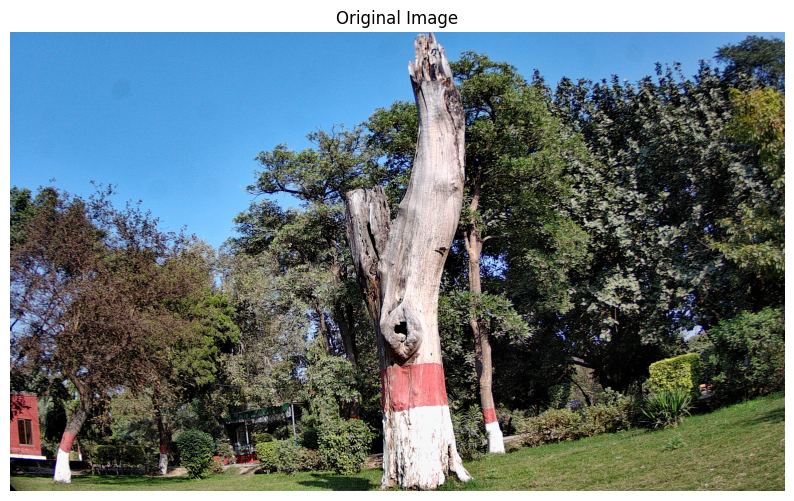

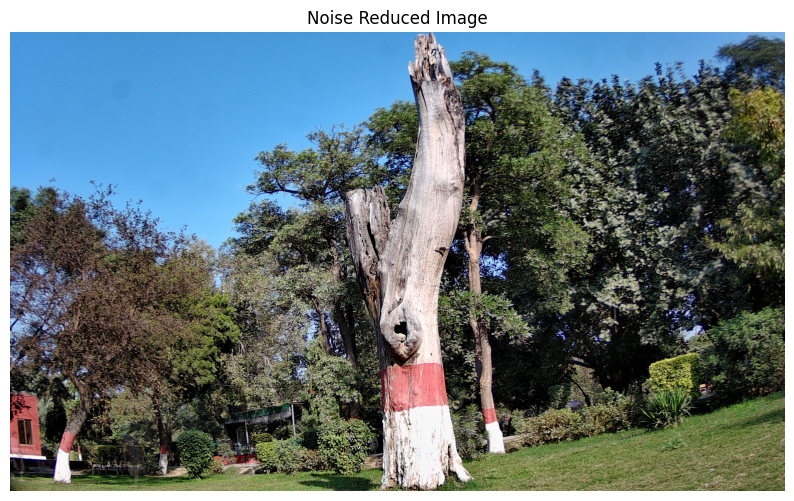

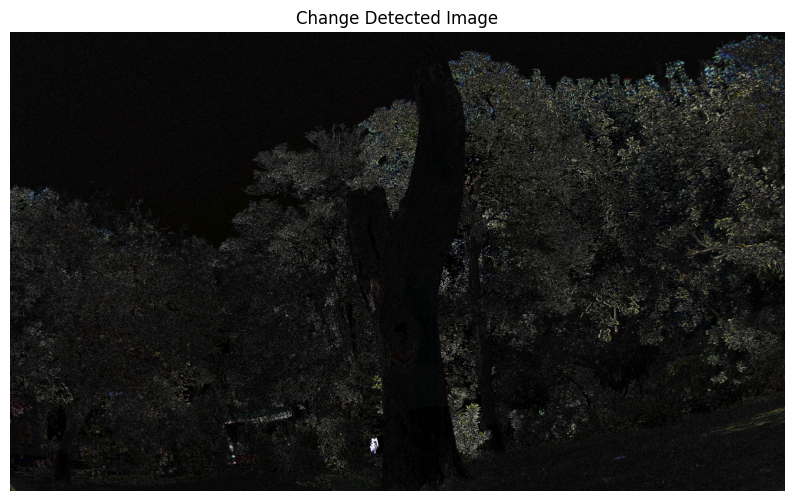

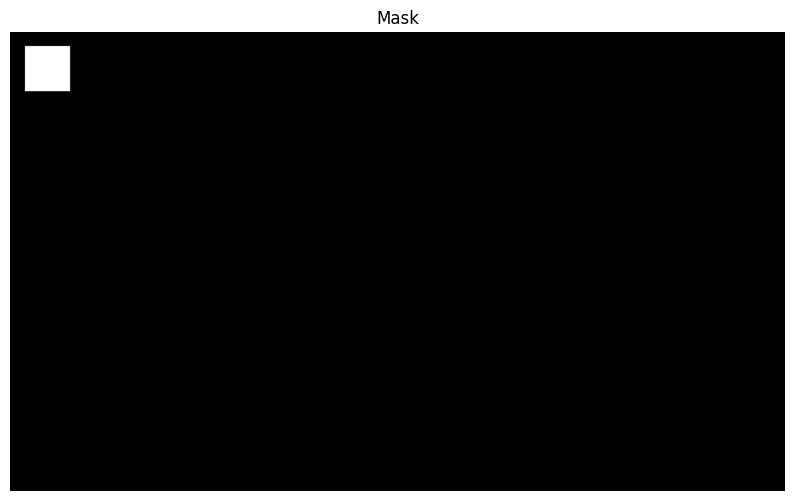

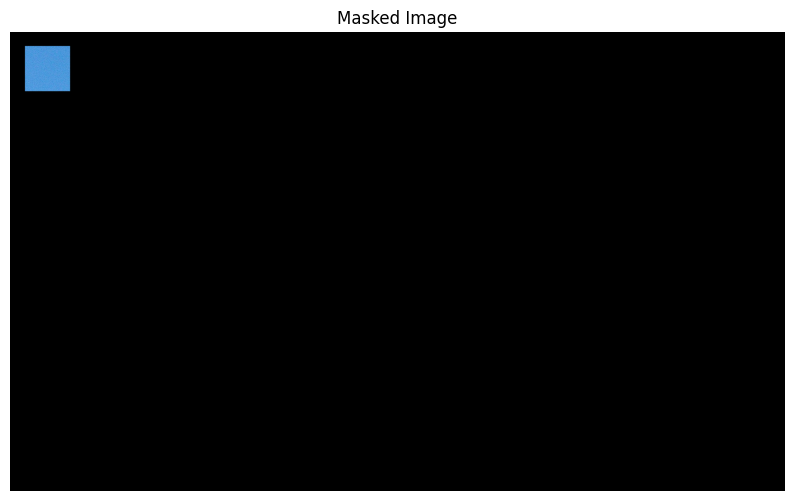

In [40]:
# Display the original image
if len(images) > 0:
    show_image('Original Image', images[0])

# Perform Noise Reduction
reduced_noise_image = noise_reduction(images)
if reduced_noise_image is not None:
    show_image('Noise Reduced Image', reduced_noise_image)

# Perform Change Detection (using the first two images for demonstration)
if len(images) > 1:
    change_detected_image = change_detection(images[0], images[1])
    show_image('Change Detected Image', change_detected_image)

# Perform Masking (using a random mask for demonstration)
if len(images) > 0:
    mask = np.zeros_like(images[0][:, :, 0], dtype=np.uint8)
    cv2.rectangle(mask, (50, 50), (200, 200), 255, -1)  # Example mask
    masked_image = apply_mask(images[0], mask)
    show_image('Mask', mask)
    show_image('Masked Image', masked_image)